# Climate Analysis of Hawaii

## Overview

The following is an analysis of the climate of Honolulu, Hawaii, US. Analysis uses the following python libraries: SQLAlchemy, pandas, numpy, matplotlib, and datetime.

### Dependencies

In [1]:
# Matplotlib dependencies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Additional dependencies

import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

# Reflect Tables into SQLAlchemy ORM

In [4]:
# create engine to hawaii.sqlite

database_path = "./Resources/hawaii.sqlite"

engine = create_engine(f"sqlite:///{database_path}")


In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

Measurement = Base.classes.measurement

Station = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)

In [9]:
# See column names, types, and nullable for measurement table

inspector = inspect(engine)

columns = inspector.get_columns('measurement')

for column in columns:
    print(column["name"], column["type"], column["nullable"])

id INTEGER False
station TEXT True
date TEXT True
prcp FLOAT True
tobs FLOAT True


In [10]:
# See column names, types, and nullable for station table

columns = inspector.get_columns('station')

for column in columns:
    print(column["name"], column["type"], column["nullable"])

id INTEGER False
station TEXT True
name TEXT True
latitude FLOAT True
longitude FLOAT True
elevation FLOAT True


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set

recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(*recent_date)

2017-08-23


In [12]:
# Calculate the date one year from the last date in data set.

year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

print(year_date)


2016-08-23


In [13]:
# Query to retrieve date and prcp values for the last year of data in the dataset

date_results = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime(Measurement.date >= year_date)).all()


In [14]:
# Save the query results as a Pandas DataFrame
date_df = pd.DataFrame(date_results, columns=['date', 'precipitation'])

# Replace NaN results in precipitation with zero
date_df['precipitation'] = date_df['precipitation'].fillna(0)

# Set the index to the date column
date_df = date_df.set_index('date')

# Sort the dataframe by date
date_df = date_df.sort_index()

# Show dataframe (5 rows)
date_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


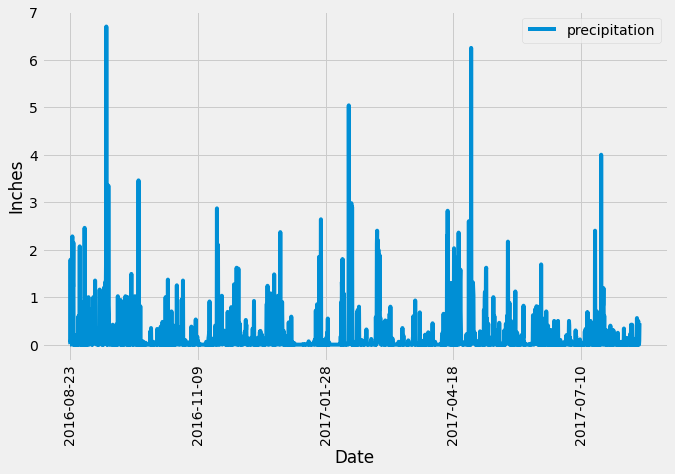

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data

date_df.plot(figsize = (10, 6), rot=90)

plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data

date_df.describe()

,precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Query to calculate the total number of stations in the dataset

session.query(func.count(Station.station)).all()

[(19550)]

In [18]:
# Query to find the most active stations, list stations and counts in descending order

session.query(Station.station, func.count(Station.station)).\
    group_by(Station.station).\
    order_by(desc(func.count(Station.station))).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Lowest, highest, and average temperature of most active station

sel = [Measurement.station,
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)
]

temp_active = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').all()

print(f"The most active station has id {temp_active[0][0]}")
print(f"The lowest temperature is {temp_active[0][1]}")
print(f"The highest temperture is {temp_active[0][2]}")
print(f"The average temperature is {round((temp_active[0][3]),2)}")

The most active station has id USC00519281
The lowest temperature is 54.0
The highest temperture is 85.0
The average temperature is 71.66


In [27]:
# Query last 12 months of tempeature data for most active station

temp_results = session.query(Measurement.tobs).\
    filter(func.strftime(Measurement.date >= year_date)).\
    filter(Measurement.station == 'USC00519281').all()

In [36]:
# Convert to dataframe, sort temperature values

temp_df = pd.DataFrame(temp_results, columns=['tobs'])

temp_df = temp_df.sort_values(['tobs'])


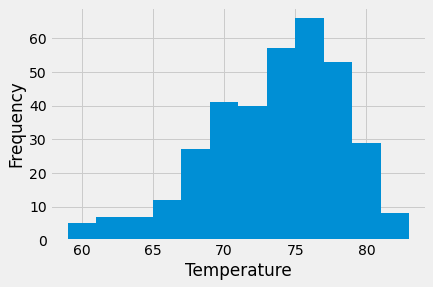

In [40]:
# Plot results as histogram

plt.hist(temp_df, bins=12)

plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()



In [35]:

plt.hist?

In [28]:
temp_results

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()